# Import libraries

In [1]:
import pandas as pd
import numpy as np
import string
import text2emotion as te
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
import math
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.mixture import GaussianMixture
from plotnine import *
from sklearn.preprocessing import StandardScaler # Z-score variables
from sklearn.metrics import silhouette_score
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Read dataset

In [2]:
df = pd.read_csv("Test2.csv", encoding = 'utf-8', error_bad_lines= False)
x = df[['Happy','Angry', 'Surprise', 'Sad', 'Fear']]
print(x.shape)
x

(3018, 5)


,Happy,Angry,Surprise,Sad,Fear
0,0.00,0.0,1.00,0.00,0.00
1,0.00,0.0,1.00,0.00,0.00
2,0.00,0.0,0.50,0.00,0.50
3,0.00,0.0,1.00,0.00,0.00
4,0.00,0.0,0.50,0.00,0.50
...,...,...,...,...,...
3013,0.00,0.0,1.00,0.00,0.00
3014,0.25,0.0,0.25,0.25,0.25
3015,0.00,0.0,1.00,0.00,0.00
3016,0.33,0.0,0.00,0.67,0.00


# Inertia method to determine the optimum group

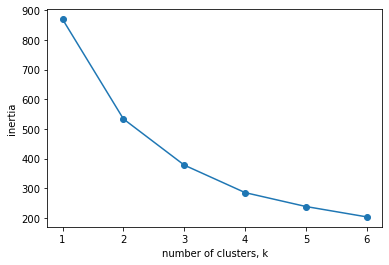

In [3]:
# Import KMeans
from sklearn.cluster import KMeans
ks = range(1, 7)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(x)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Fit transform the features

In [4]:
features = ["Happy","Angry","Surprise","Sad","Fear"]

z = StandardScaler()

x[features] = z.fit_transform(x)

<ipython-input-4-7ef61fb8a32a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Get the label

In [5]:
# Create a multivariate Gaussian distribution instance with 2 clusters: model
gmm = GaussianMixture(n_components=2)

# Fit model to points
gmm.fit(x)

# Determine the cluster labels of new_points: labels
label = gmm.fit_predict(x)

# Create a csv file manually and assign read the file

In [6]:
df = pd.read_csv("Test3.csv", encoding = 'utf-8', error_bad_lines= False)
df

,Anomaly
0,0
1,0
2,0
3,0
4,0
...,...
3013,0
3014,0
3015,0
3016,0


## The file should have the same size of the rows with the dataset

# After that assign the results into the file

In [7]:
df = pd.DataFrame(data=label)
print(df)
df.to_csv("Test3.csv", header=True, index=False, encoding='utf-8-sig')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [8]:
label

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)